# Table of Contents

# 1. Introduction
* Introduction

* Importing necessary libraries

# 2. Data

* Data creation

* Data splitting

# 3. Model

* PyTorch model buildng essentials

* Checking contents of PyTorch model

* Making predictions

# 4. Train Model

* Loss Function & Optimizer

* Optimization Loop

* Making Predictions

# 5. Saving and Loading a PyTorch Model

# Introduction

##### The essence of machine learning and deep learning is to take some data from the past, make an algorithm to discover a pattern and numerical figures that give us the most optimal results.
##### In thie notebook, we will be covering this workflow.
1) Getting data ready
2) Building a model 
3) Fitting the model to the data (training)
4) Making predictions and evaluating a model 

## Importing necessary libraries

In [96]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt

# Data

##### For the task of machine learning, data can be in any format, be it images, audio files or speeches.
##### The user then has to be able to turn this data into numerical figures (a representation).
##### This will help the model understand the input data.
##### For thie notebook, we would just create data as a straight line.
##### We will obtain these data using linear regression and check if PyTorch is able to estimate the regression parameteres using gradient descent.

## Data creation

In [97]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Data splitting

##### Now the next step is important, also known as the train-test-split.
##### It is important to divide up the data into training and testing groups. 
##### The training data will be used to train our model and it will be used to predict the testing data to see how well our model learned.
##### This is extremely necessary to prevent overfitting of our model, which could happen right under our nose if we do not take enough precautions. 

In [98]:
# Train-test-split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

##### So we will be using 40 of our datapoints (80%) to train our model and the remaining 10 data points (20%) to test our model.
##### Let's first create a function that will help us visualize our training and testing data points.

In [99]:
def plot_predictions(X_train = X_train,
                    y_train = y_train,
                    X_test = X_test,
                    y_test = y_test,
                    predictions=None):

    plt.figure(figsize=(16,10))

    # Scatter plot the training data points
    plt.scatter(X_train, y_train, c='b', s = 6, label='Training Data')

    # Scatter plot the testing data points
    plt.scatter(X_test, y_test, c='g', s=6, label='Testing data')

    if predictions is not None:
        plt.scatter(X_test, predictions, c= 'r', s=6, label='predictions')

    plt.legend(prop={'size':14})

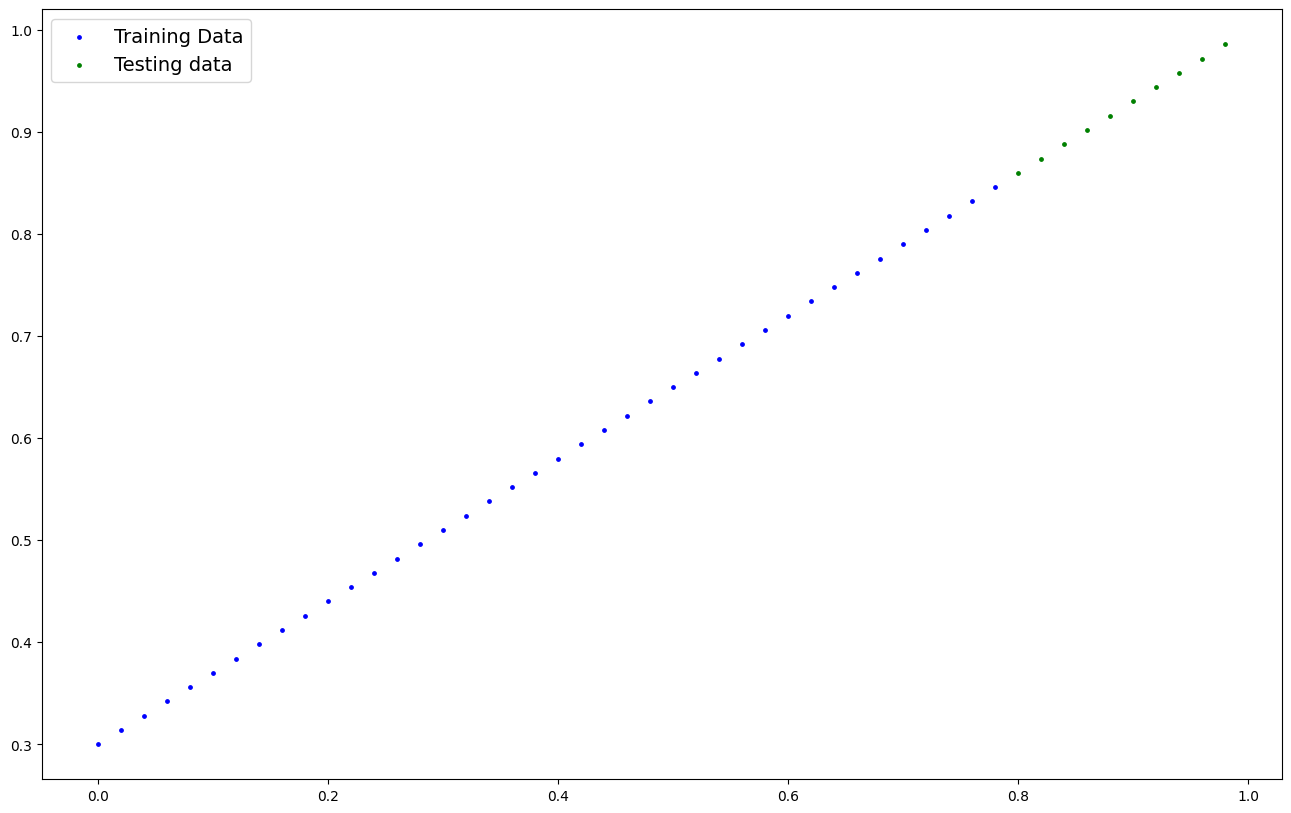

In [100]:
plot_predictions()

##### Now by utilizing this function, we are now able to visualize our data points and hopefully check with our eyes the results of our predictions.

# Model

##### Now, remember what we are trying to do.
##### We are trying to learn from the blue dots to predict the green dots.
##### Let's first create a very simple Linear Regression model class.

In [101]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), # Start with random weights
        requires_grad=True) # Making sure gradient descent works

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
        requires_grad=True)

    # Forward Feed
    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input tensor and we expect our output to be a tensor too
        return self.weights * x + self.bias # linear regression formula

""" # Using nn.Linear() 
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
"""

## PyTorch model buildng essentials

##### For PyTorch, python classes are used extensively to create bits and pieces for building neural networks.
##### So PyTorch has four essential modeuls that is used to create any kind of neural network.
##### They are:
1) torch.nn
2) torch.optim
3) torch.utils.data.Dataset
4) torch.utils.data.DataLoader
##### Additionally, the torch.nn.Module is the base class for all neural network modules.
##### They are the building blocks for neural networks.
##### They require the forward() method to be implemented
##### We can see this in the code block above.
##### Also, nn.Parameter contains the smaller parameters like weights nad biases and torch.optim will help with the optimization methods to improve these parameters to obtain the most effective values.

## Checking contents of PyTorch model

In [102]:
torch.manual_seed(42) # For reproducability

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [103]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##### These weights and biases are randomized and would thus not prove to be effective in our predictions.

## Making predictions

##### With PyTorch, we can use the **torch.inference_mode()**.
##### This is simply telling the PyTorch we are just passing inputs into our model but for testing purposes. 
##### This is helpful to the model because it knows that it does not need to keep track of the gradients. 
##### To pass in our inputs, we just need to pass them as the model's parameter and it would go through the forwards() method automatically.

In [104]:
with torch.inference_mode():
    y_preds = model_0(X_test)

##### Let us check our predictions.

In [105]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted Values: \n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted Values: 
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


##### Let's see how these values compare with the actual test values.

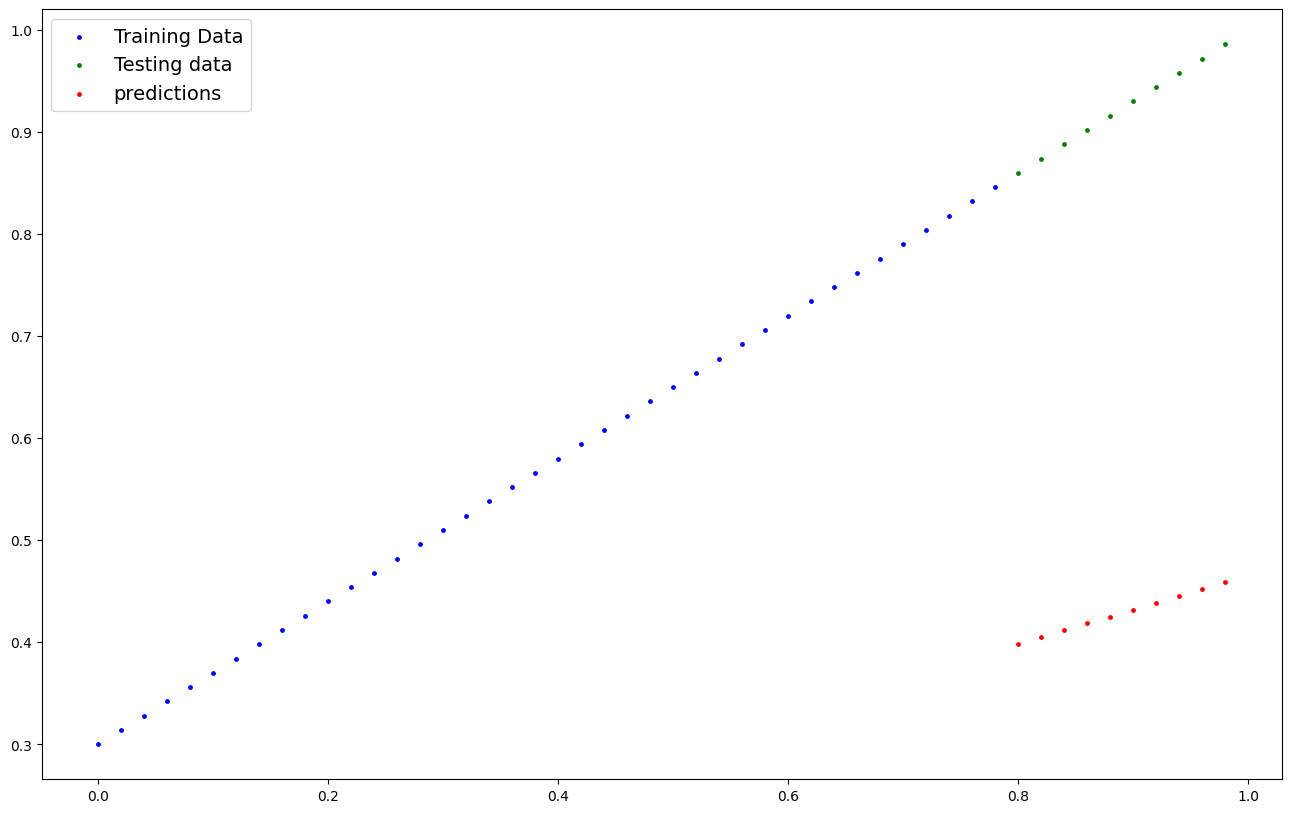

In [106]:
plot_predictions(predictions=y_preds)

##### As we can see, and as we expected, the predictions are pretty horrendous.
##### The red points are nowhere near the green dots.
##### But obviously, with random values, this is to be expected. 
##### Now let us train our model.

# Train Model

##### Now instead of random values for our weights and biases, let us train the model to help it find the optimal values for them.

## Loss Function & Optimizer

#### What is a loss function?
##### It is a way to tell the machine how wrong their predicted values are compared to the actual values. 
#### What are optimizers? 
##### They tell the model how to update its internal parameters to converge to the most optimal values.


##### There are myriad of loss functions and optimizers out there but let us utilize the MAE (Mean Abosolute Error) for our example since we are carrying out a linear regression problem.

##### For our optimizer, we will use the SGD (Stochastic Gradient Descent), torch.optim.SGD.

In [107]:
# Loss Function
loss_fn = nn.L1Loss() # MAE Loss

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

## Optimization Loop

##### The training loop is a process that involves going through the training data and learning the relationship between the features and labels.
##### The testing loop involves going through the testing data and evaluating how good our model is and how much it learnt from the training data.

##### So the essential training loop will look something like this. 
1) Forward pass
2) Calculate the loss
3) Zero gradients - optimizers' gradients are set to zero 
4) Perform backpropagation on the loss - calculate the gradient of the loss w.r.t every model parameter
5) Update the optimizer (Gradient Descent)

##### The testing loop will look something like this.
1) Forward pass
2) Calculate the loss
3) Calculate evaluation metric (optional)

##### It is important that you notice that there are no backpropagation or stepping the optimizer in the testing loop. 
##### This is because the parameters are not to be touched with in this testing loop.

##### Now let us put all of that together and train our model for 100 **epochs** and we will evaluate for every 10 epochs to see how our model is faring.

In [108]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training 

    model_0.train() # Training mode (default mode)

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train) # Calculate the loss value

    optimizer.zero_grad() # Zero the gradient of the optimizer

    loss.backward() # Backpropagation starts

    optimizer.step()

    # Testing

    model_0.eval() # Evaluation mode

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Train Loss: 0.02788740023970604 | MAE Test Loss: 0.06473556160926819


##### Let's see how our train and test loss progresses.

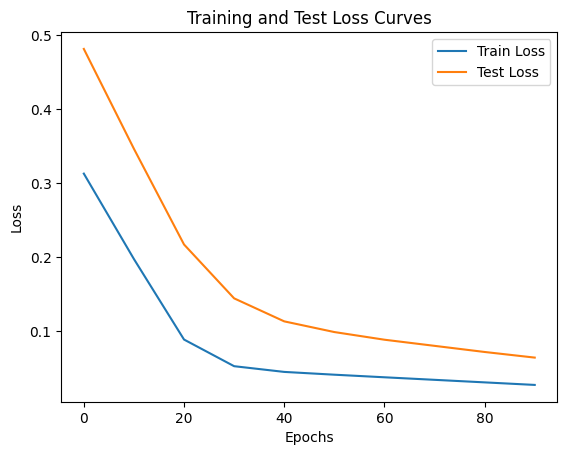

In [109]:
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

##### As any machine learning enthusiast will tell you, that is some fabulous feat!

##### We can check at the optimal values for our weights and biases if we are interested.

In [110]:
print("The model learned the following weights and biases:")
print(model_0.state_dict())

The model learned the following weights and biases:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


##### This is the real, foundational basic workings of PyTorch models!

# Making Predictions

##### Now with our model created, we can go ahead and make predictions to the input data that we are interested in.
##### We need to remember these three factors before we do so:
1) Set the model in eval mode; model.eval()

2) Make predictions using the inference mode context manager (torch.inference_mode())
3) All predictions should be made with objects on the same device (CPU or GPU)

In [111]:
model_0.eval()

with torch.inference_mode(): # Asks the model not to keep track of the gradients
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

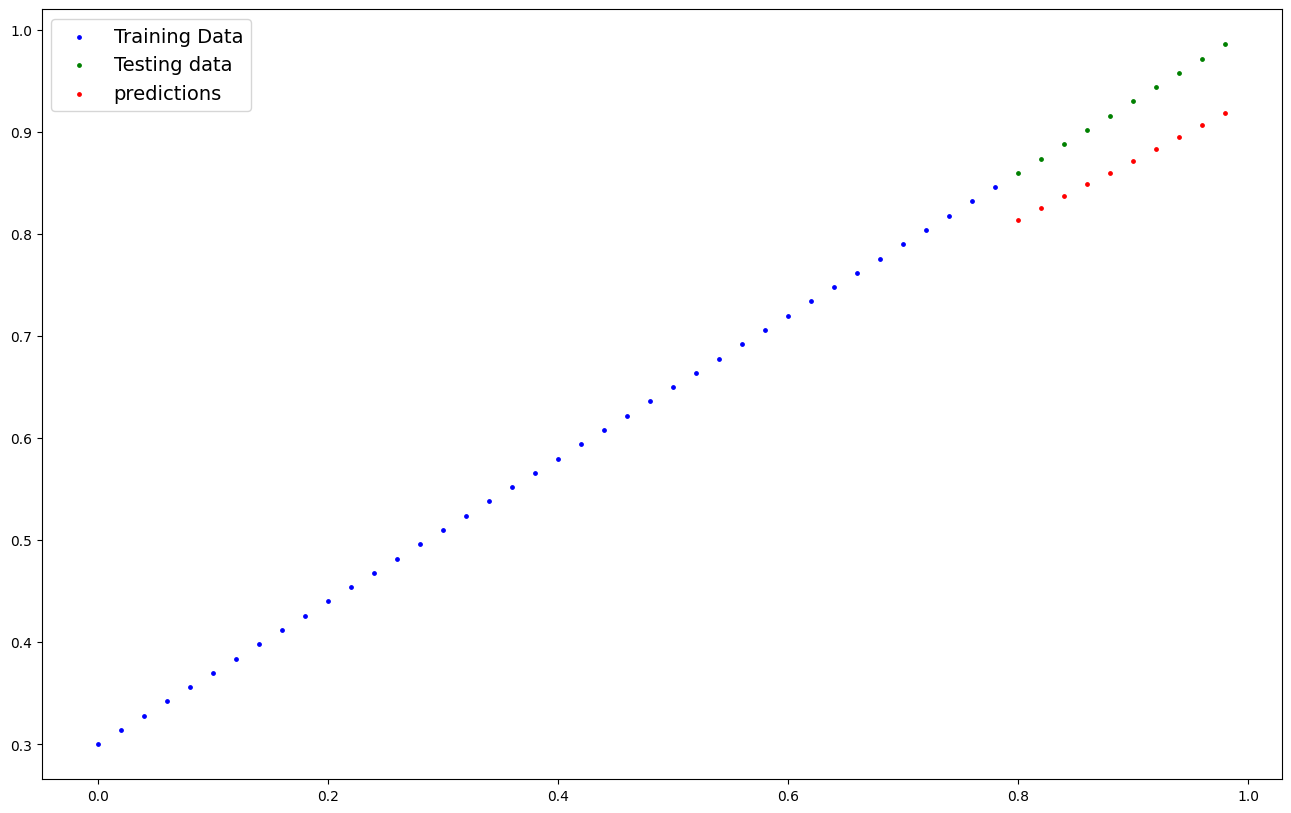

In [112]:
plot_predictions(predictions=y_preds)

##### That is pretty close to the actual values!
##### Good job!